In [1]:
import numpy as np
%matplotlib inline
#%matplotlib ipympl ma
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from sklearn import linear_model
#plt.rcParams["figure.figsize"] = (10,8)
import math
import seaborn as sns


In [2]:
df = pd.read_csv("Optimization datasheet.csv")
#df

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support tr

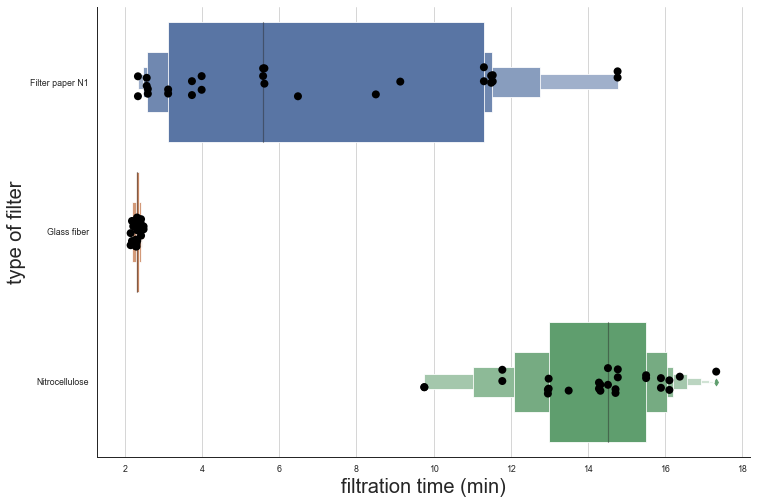

In [3]:
plt.rcParams["figure.figsize"] = (11.7*2,8.27)
#sns.set(style="white")
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":30,"axes.titlesize":20,"axes.labelsize":20},style="white", context='paper')
sns.despine()
plt.grid()


dfv = df[df['type of filter']!= 'GF control'].copy()
dfv['eDNA'] = dfv['log10[eDNA]'].apply(lambda x: 10**x)
dfv['percentage'] = dfv['eDNA']/27.57
dfv['log10 percentage'] = dfv['percentage'].apply(lambda x: math.log10(x))

#sns.violinplot(x="filtration time (min)", y="type of filter", data=dfv, 
#               scale="count",scale_hue=False,split=True,cut=0, bw=.29)
ax = sns.boxenplot(x="filtration time (min)", y="type of filter", data=dfv )
ax = sns.stripplot(x="filtration time (min)", y="type of filter", data=dfv , jitter=True, size = 8, color = 'black')
sns.despine()
plt.savefig('filtration time.eps')

In [4]:
def zm(a):
    if a == 'Yes': return 'Zymo'
    return ''

In [5]:
dfv['Time (min)'] = dfv['filtration time (min)']*24 + dfv['extraction time']*96/9 + 120 #120 is the time for the qPCR


In [6]:
dc = {'QIagen':'p' , 'Dipstick':'x', 'NaOH':'o', 'Magnetic Beads':'^', 'Dipstick to qPCR':'+', 'Filter paper N1': 'b', 'Glass fiber': 'green', 'Nitrocellulose': 'red'}

def markerMaker( ext):
    return  dc[ext]
def colormaker(fil):
    return dc[fil]
inv_dc = {v: k for k, v in dc.items()}

dfv['Method'] = dfv.apply(lambda row: row['type of filter'] +' ' +row['type of extraction']+' ' +zm(row.ZYMO) , axis=1) #
dfvshort = dfv[dfv.cq.notnull()].copy()
dfvshort['mark']= dfvshort.apply(lambda row: markerMaker(row['type of extraction']),axis =1)
dfvshort['color']= dfvshort['type of filter'].apply(colormaker)
dfvshort['size'] =dfvshort.ZYMO.apply(lambda x: [150 if x == 'Yes' else 50][0])



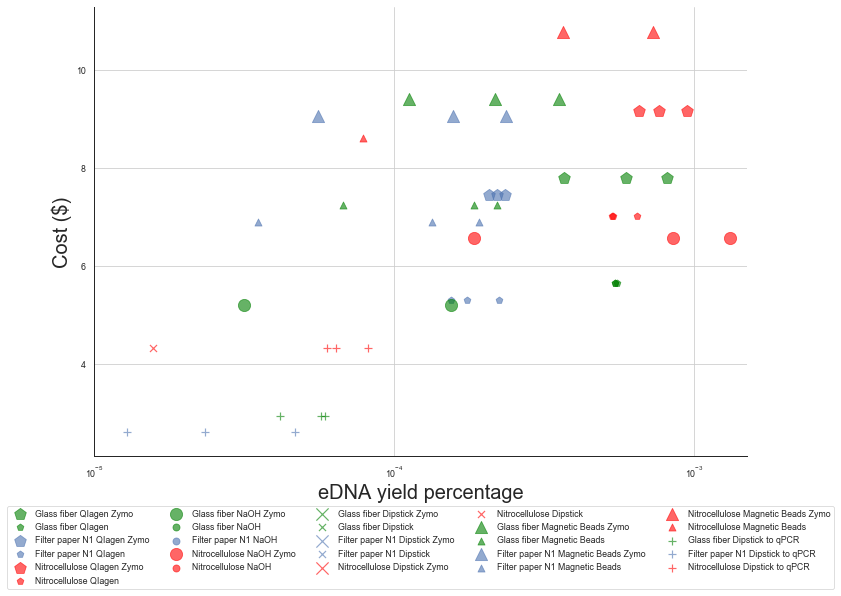

In [7]:
ax = dfvshort[(dfvshort['mark']=='x')&(dfvshort['color']=='red')&(dfvshort['size']==150)].plot.scatter(x="log10[eDNA]",  y="Cost ($)", color='red',  s = 0, marker = 'x' )
for marker in ['p', 'o', 'x', '^', '+']:
    for color in ['green', 'b', 'red']:
        for size in [150, 50]:
            a = dfvshort[(dfvshort['mark']==marker)&(dfvshort['color']==color)&(dfvshort['size']==size)]
            if a.empty != 1: a.plot.scatter(x="percentage", y="Cost ($)", color=color, s= size, marker = marker, alpha = .6,ax=ax, label = a.iloc[0, 13]  )
plt.xlim([1e-5, 0.0015])
ax.set_xscale('log')
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.xlabel('eDNA yield percentage')
sns.despine()
plt.grid()
plt.savefig('allcost.png')

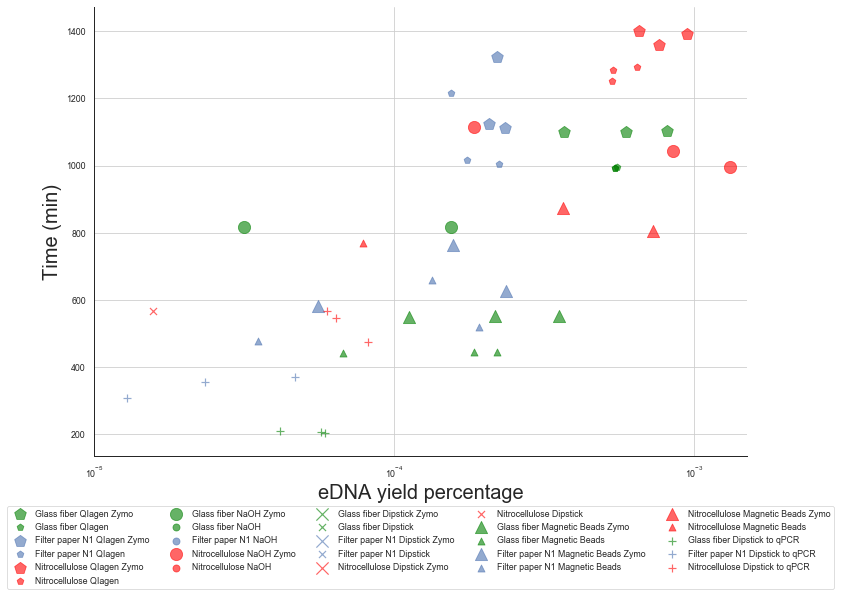

In [8]:
ax = dfvshort[(dfvshort['mark']=='x')&(dfvshort['color']=='red')&(dfvshort['size']==150)].plot.scatter(x="log10[eDNA]",
                                                                                                    y="Time (min)", color='red', 
                                                                                                       s = 0, marker = 'x')
for marker in ['p', 'o', 'x', '^', '+']:
    for color in ['green', 'b', 'red']:
        for size in [150, 50]:
            a = dfvshort[(dfvshort['mark']==marker)&(dfvshort['color']==color)&(dfvshort['size']==size)]
            if a.empty != 1: a.plot.scatter(x="percentage", y="Time (min)", color=color, s= size, marker = marker, alpha = .6,ax=ax, label =a.iloc[0, 13] )
plt.xlim([1e-5, 0.0015])
ax.set_xscale('log')
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.xlabel('eDNA yield percentage')
sns.despine()
plt.grid()
plt.savefig('all.png')

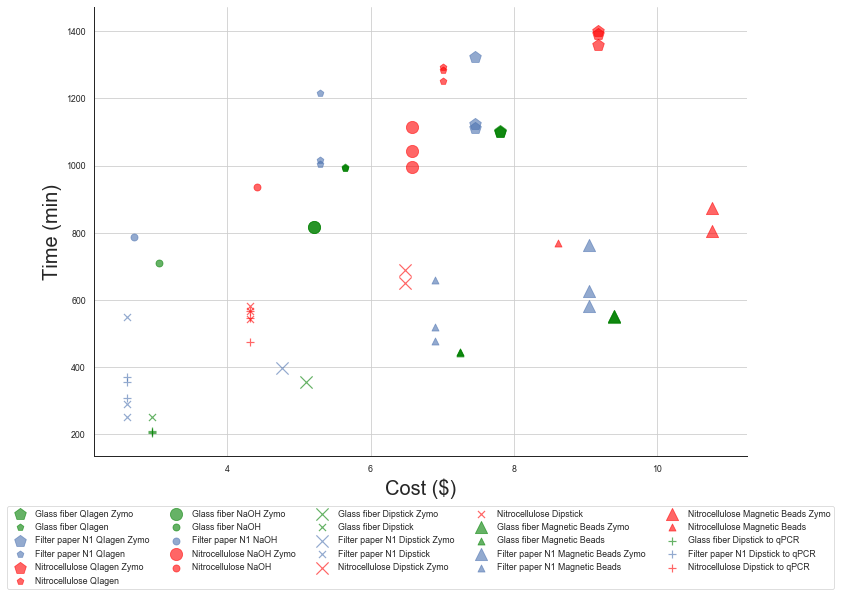

In [9]:

ax = dfvshort[(dfvshort['mark']=='x')&(dfvshort['color']=='red')&(dfvshort['size']==150)].plot.scatter(x="Cost ($)",
                                                                                                    y="Time (min)", color='red', 
                                                                                                       s = 0, marker = 'x' )
for marker in ['p', 'o', 'x', '^', '+']:
    for color in ['green', 'b', 'red']:
        for size in [150, 50]:
            a = dfvshort[(dfvshort['mark']==marker)&(dfvshort['color']==color)&(dfvshort['size']==size)]
            if a.empty != 1: a.plot.scatter(x="Cost ($)", y="Time (min)", color=color, s= size, marker = marker, alpha = .6,ax=ax , label =a.iloc[0, 13] )
#ax.set_xlim([-4.5, -1.5])
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)
sns.despine()
plt.grid()

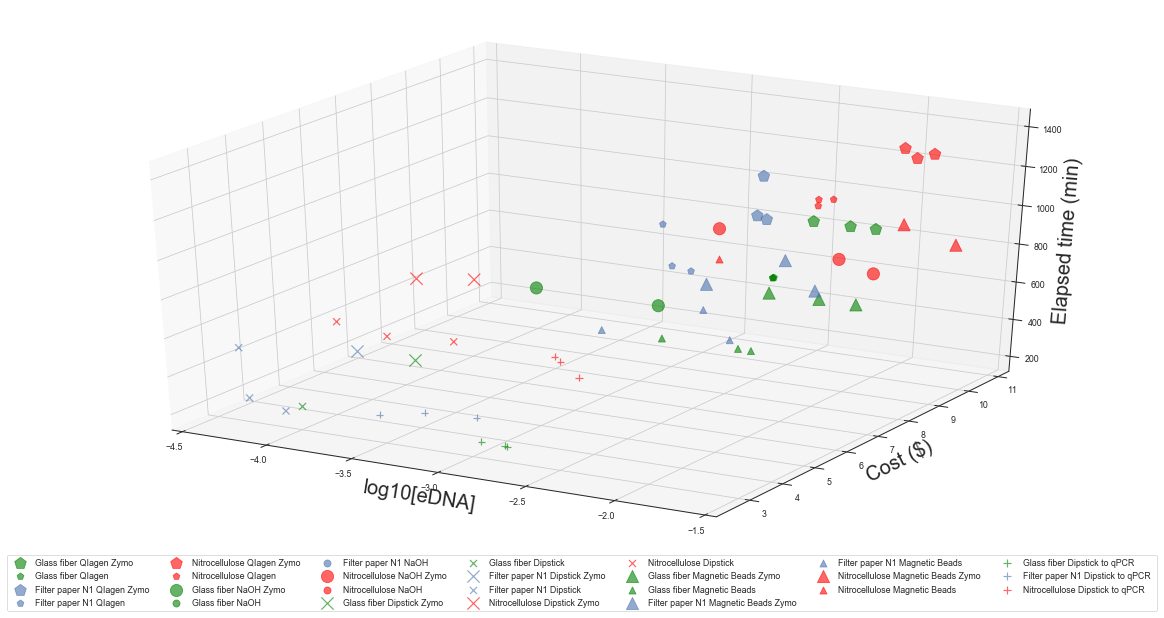

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')


for marker in ['p', 'o', 'x', '^', '+']:
    for color in ['green', 'b', 'red']:
        for size in [150, 50]:
            a = dfvshort[(dfvshort['mark']==marker)&(dfvshort['color']==color)&(dfvshort['size']==size)]
            if a.empty != 1: ax.scatter(xs=list(a["log10[eDNA]"]), ys=list(a["Cost ($)"]), zs=list(a['Time (min)']) ,
                                        color=color, s= size, marker = marker, alpha = .6, label =a.iloc[0, 13] )
ax.set_xlim([-4.5, -1.5])
plt.xlabel('log10[eDNA]')
plt.ylabel('Cost ($)')
ax.set_zlabel('Elapsed time (min)')
ax.legend(loc=9, bbox_to_anchor=(0.5, 0), ncol=7)

In [11]:
#dfv_fig1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


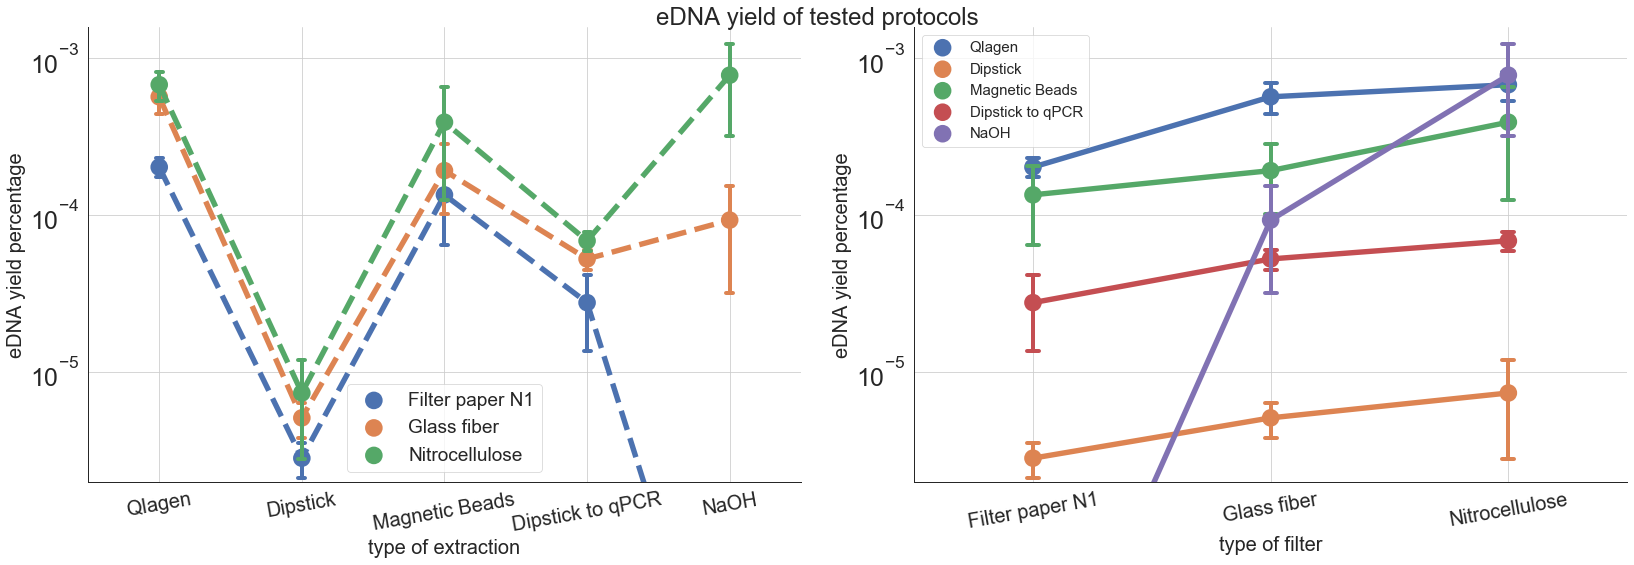

In [12]:
plt.rcParams["figure.figsize"] = (11.7*2,8.27)

dfv_fig1 = dfv[dfv['log10[eDNA]']>-4.5].copy()
dfv_fig1 =dfv_fig1.append(pd.DataFrame([['N_', 'Filter paper N1', '0', 'NaOH', '0','0', -6, '0', 'No', '0', '0', '0', '0', '0']], columns = dfv_fig1.columns))
dfv_fig1['eDNA'] = dfv_fig1['log10[eDNA]'].apply(lambda x: 10**x)
dfv_fig1['eDNA yield percentage'] = dfv_fig1['eDNA']/27.57
plt.suptitle('eDNA yield of tested protocols', size= 24)
plt.subplot(1,2,1)
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=25)

with plt.rc_context({'lines.linewidth': 3}): g1 =sns.pointplot(y='eDNA yield percentage', x="type of extraction", hue="type of filter", errwidth =4, capsize=.05, linestyles='--',
              ci="sd", data=dfv_fig1)#palette=["b", "g", "r"],dfv[dfv['log10[eDNA]']>-4.5]
plt.legend(loc='best',fontsize = 19)
plt.grid()

g1.set(yscale='log')
plt.ylim([10**(-5.7),10**(-2.8)])
plt.subplot(1,2,2)
with plt.rc_context({'lines.linewidth': 3}): g2 = sns.pointplot(y='eDNA yield percentage', hue="type of extraction", x="type of filter",  errwidth =4, capsize=.05,
              ci="sd", data=dfv_fig1, palette = sns.color_palette())#palette=["b", "gray", "red", 'black', 'green']
g2.set(yscale='log')
plt.ylim([10**(-5.7),10**(-2.8)])
sns.despine()
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=25)
plt.legend(loc='upper left',fontsize = 15)


plt.grid()
plt.tight_layout()
plt.savefig('edna yield.eps')

In [14]:
#with plt.rc_context({'lines.linewidth': 3}): g2 = sns.pointplot(y='eDNA yield percentage', hue="type of extraction", x="ZYMO",  errwidth =4, capsize=.05,
#              ci="sd", data=dfv_fig1, palette=["b", 'darkorange', "seagreen",'mediumturquoise', 'orangered'])#palette=["b", "gray", "red", 'black', 'green']


In [15]:
plt.rcParams["figure.figsize"] = (11.7*2,8.27)
dfv['eDNA'] = dfv['log10[eDNA]'].apply(lambda x: 10**x)
dfv['eDNA yield percentage'] = dfv['eDNA']/27.57
#plt.suptitle('eDNA yield of tested protocols', size= 24)
#plt.subplot(1,2,1)
#g1 =sns.pointplot(y='eDNA yield percentage', x="type of extraction", hue="type of filter",
#              ci="sd", data=dfv_fig1)#palette=["b", "g", "r"],dfv[dfv['log10[eDNA]']>-4.5]
#plt.grid()

#g1.set(yscale='log')
#plt.ylim([10**(-5.7),10**(-2.8)])
#plt.subplot(1,2,2)
#g2 = sns.pointplot(y='eDNA yield percentage', hue="type of extraction", x="type of filter",
#              ci="sd", data=dfv_fig1, palette = sns.color_palette())#palette=["b", "gray", "red", 'black', 'green']
#g2.set(yscale='log')
#plt.ylim([10**(-5.7),10**(-2.8)])
#sns.despine()
#plt.grid()
#plt.tight_layout()
#plt.savefig('edna yield.png')

In [17]:
#plt.rcParams["figure.figsize"] = (11.7,8.27)

#g = sns.swarmplot(x="eDNA yield percentage", y="type of extraction", hue="type of filter",
           #   palette=["b", "g", "r"], data=dfv[dfv['log10[eDNA]']>-4.5], size = 14)
#plt.xlim([0, .0015])
#sns.despine()
#plt.grid()
#plt.savefig('extraction yield.eps')


In [18]:
#plt.rcParams["figure.figsize"] = (11.7*2,8.27)

#plt.subplot(1,2,1)
#sns.pointplot(y="percentage", hue="type of filter", x="ZYMO",palette=["b", 'g', 'r'], data=dfv[dfv['log10[eDNA]']>-5])
#sns.despine()
#plt.grid()

#plt.subplot(1,2,2)
#sns.pointplot(y="percentage", hue="type of extraction", x="ZYMO", palette=["b", "gray", "red", 'black', 'green'], data=dfv_fig1)
#sns.despine()
#plt.grid()
#plt.tight_layout()
#plt.savefig('zymo effects.eps')


In [19]:
#dfv_fig1

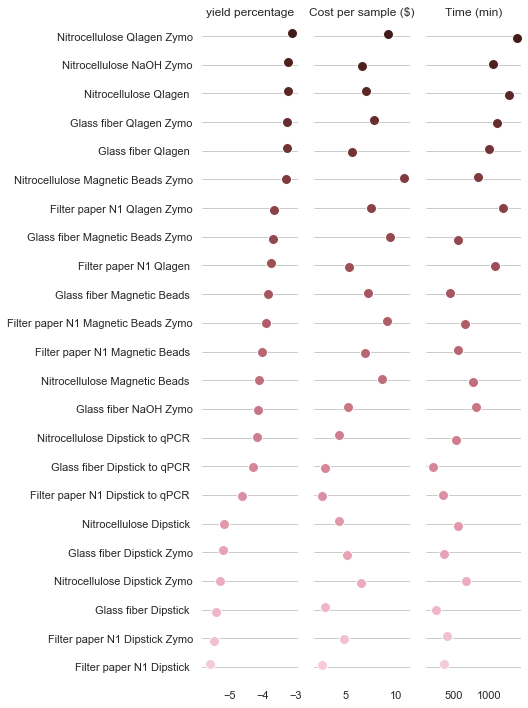

In [20]:
sns.set(style="whitegrid")

a = dfv[dfv['log10[eDNA]']>-5].groupby('Method').mean()
a["method"] = a.index

# Make the PairGrid
g = sns.PairGrid(a.sort_values("log10 percentage", ascending=False),
                 x_vars=["log10 percentage", 'Cost ($)', 'Time (min)'], y_vars='method',
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set( xlabel='', ylabel="")#xlim=(0, 25)

# Use semantically meaningful titles for the columns
titles = ["yield percentage", "Cost per sample ($)", "Time (min)"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig('major comparison.eps')

In [21]:
def pretty (label, values, name, rota = -.25, df = dfv, dna = True, l = .7):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    pal = sns.cubehelix_palette(30, rot=rota, light=l)
    g = sns.FacetGrid(df, row=label,hue=label, aspect=12, palette=pal,  xlim=(-4.5,-1.5))#
    g.set(xlim=[-4.5, -1.5])


    # Draw the densities in a few steps
    g.map(sns.kdeplot, values, clip_on=False, shade=True, alpha=.8, lw=1.5, bw=.2)
    g.map(sns.kdeplot, values, clip_on=False, color="w", lw=2, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)
        if dna: ax.set_xlim(-9,-1)


    g.map(label, values)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True) 
    plt.savefig(name)

In [23]:
#pretty('type of extraction', 'log10[eDNA]', 'method efficiency test')

In [24]:
#pretty("ZYMO",'log10[eDNA]', 'zymo effects')

In [25]:
#pretty('type of extraction', 'log10[eDNA]', 'whatmanfull', df = dfv[dfv['type of filter']=='whatman'])
#pretty('type of extraction', 'log10[eDNA]', 'glassfull', df = dfv[dfv['type of filter']=='glass filter'], rota = .75)
#pretty('type of extraction', 'log10[eDNA]', 'mcifull', df = dfv[dfv['type of filter']=='nitrile'], rota = .5)

In [26]:
#pretty('type of extraction', 'log10[eDNA]', 'whatmanZ', df = dfv[(dfv['type of filter']=='whatman') & (dfv['ZYMO']=='Yes')], rota = 1)
#pretty('type of extraction', 'log10[eDNA]', 'glassZ', df = dfv[(dfv['type of filter']=='glass filter')& (dfv['ZYMO']=='Yes')], rota = .5)
#pretty('type of extraction', 'log10[eDNA]', 'mciZ', df = dfv[(dfv['type of filter']=='nitrile')& (dfv['ZYMO']=='Yes')], rota = .24)
#pretty('type of extraction', 'log10[eDNA]', 'whatman', df = dfv[(dfv['type of filter']=='whatman') & (dfv['ZYMO']=='No')], rota = 1, l = .88)
#pretty('type of extraction', 'log10[eDNA]', 'glass', df = dfv[(dfv['type of filter']=='glass filter')& (dfv['ZYMO']=='No')], rota = .5, l=.88)
#pretty('type of extraction', 'log10[eDNA]', 'mci', df = dfv[(dfv['type of filter']=='nitrile')& (dfv['ZYMO']=='No')], rota = .24, l=.888)

# estimating DNA retrieval percentage per method and filter 

## equation (theory 1 inhibitor effects bind to DNA)
$$ eDNA_{Retrived} = eDNA_{Sample}*FilterLoss*ExtractionLoss*ZymoLoss  - inhibitorCarryover(filter)* inhibitorCarryover(extraction)*Bolean(ZYMO)$$

## equation (theory 2 inhibitor effects amplification) 
$$ \frac{eDNA_{Retrived}}{eDNA_{Sample}} = FilterLoss*ExtractionLoss  - inhibitorCarryover*Bolean(ZYMO)$$

### testing without inhibitor test first: 
#### for simplification will use that $eDNA_{Sample} =1$
### from 08/20/2018 experiments we can estimate that the initial amount of eDNA in ng of copies is 27.57ng of copies/L

In [22]:
import lmfit as lm
matplotlib.style.use('ggplot')


In [23]:
dfv['log10[eDNA]'] = dfv['log10[eDNA]'].apply(lambda x: [-10 if np.isnan(x) else x][0] )
dfv['eDNA'] = dfv['log10[eDNA]'].apply(lambda x: 10**x)
dfv['percentage'] = dfv['eDNA']/27.57
dfv['boolZymo'] = dfv['ZYMO'].apply(lambda x: [.01 if x == 'No' else 0][0])
#dfv


In [24]:
par = lm.Parameters()
# add with tuples: (NAME VALUE VARY MIN  MAX  EXPR  BRUTE_STEP)
par.add_many(('whatmanR', .1, True, .0, 1., None, None),
                 ('glassR', .1, True, 0.0, 1., None, None),
                 ('MCIR', .1, True, .0, 1., None, None),
                ('QIagenR', .3, False, .0, 1., None, None),
                ('BeadsR', .3, True, .0, 1., None, None),
                ('DipstickR', .3, True, .0, 1., None, None),
                ('NaOHR', .3, True, .0, 1., None, None),
                ('dDipstickR', .3, True, .0, 1., None, None))
                #('whatmanI', .5, True, .0, 1., None, None),
                 #('glassI', .5, True, 0.0, 1., None, None),
                 #('MCII', .5, True, .0, 1., None, None),
                #('QIagenI', .5, True, .0, 1., None, None),
                #('BeadsI', .5, True, .0, 1., None, None),
                #('DipstickI', .5, True, .0, 1., None, None),
                #('NaOHI', .5, True, .0, 1., None, None),
                #('dDipstickI', .5, True, .0, 1., None, None))
                

In [25]:
def residual(p):
    Rfil = {'whatman': p['whatmanR'], 'glass': p['glassR'], 'nitrile': p['MCIR']}
    #Ifil = {'whatman': p['whatmanI'], 'glass': p['glassI'], 'nitrile': p['MCII']}
    Rext = {'QIagen': p['QIagenR'], 'NaOH': p['NaOHR'], 'Magnetic Beads': p['BeadsR'], 'Dipstick to qPCR': p['dDipstickR'], 'Dipstick': p['DipstickR']}
    #Iext = {'QIagen': p['QIagenI'], 'NaOH': p['NaOHI'], 'Magnetic Beads': p['BeadsI'], 'Dipstick- direct pcr': p['dDipstickI'], 'Dipstick': p['DipstickI']}
    return list(dfv.apply(lambda row:row['eDNA']/27.57- Rfil[row['type of filter']]*Rext[row['type of extraction']], axis= 1)) # + row['boolZymo']*Ifil[row['type of filter']]*Iext[row['type of extraction']]

In [26]:
#%%time
#sum(residual(par))

In [27]:
#mini = lm.Minimizer(residual, par)
#result = mini.minimize()

In [28]:
#print(lm.fit_report(result.params))

# testing with inhibitors (hypotesis 2)

In [29]:
par = lm.Parameters()
# add with tuples: (NAME VALUE VARY MIN  MAX  EXPR  BRUTE_STEP)
par.add_many(('whatmanR', .1, True, .0, 1., None, None),
                 ('glassR', .2, True, 0.0, 1., None, None),
                 ('MCIR', .3, True, .0, 1., None, None),
                ('QIagenR', .8, False, .0, 1., None, None),
                ('BeadsR', .1, True, .0, 1., None, None),
                ('DipstickR', .1, True, .0, 1., None, None),
                ('NaOHR', .1, True, .0, 1., None, None),
                ('dDipstickR', .1, True, .0, 1., None, None),
                ("a", .1, True, 0.1, 1, None, None))
                #('whatmanI', .5, True, .0, 1., None, None),
                 #('glassI', .794, False, 0.0, 1., None, None),
                 #('MCII', .5, True, .0, 1., None, None),
                #('QIagenI', .3, False, .0, 1., None, None),
                #('BeadsI', .5, True, .0, 1., None, None),
                #('DipstickI', .5, True, .0, 1., None, None),
                #('NaOHI', .5, True, .0, 1., None, None),
                #('dDipstickI', .5, True, .0, 1., None, None))
                

    
def residual(p):
    Rfil = {'whatman': p['whatmanR'], 'glass': p['glassR'], 'nitrile': p['MCIR']}
    #Ifil = {'whatman': p['whatmanI'], 'glass filter': p['glassI'], 'nitrile': p['MCII']}
    Rext = {'QIagen': p['QIagenR'], 'NaOH': p['NaOHR'], 'Magnetic Beads': p['BeadsR'], 'Dipstick- direct pcr': p['dDipstickR'], 'Dipstick': p['DipstickR']}
    #Iext = {'QIagen': p['QIagenI'], 'NaOH': p['NaOHI'], 'Magnetic Beads': p['BeadsI'], 'Dipstick- direct pcr': p['dDipstickI'], 'Dipstick': p['DipstickI']}
    return list(dfv.apply(lambda row:row['eDNA']/27.57- 
                          Rfil[row['type of filter']]*Rext[row['type of extraction']]
                          - row['boolZymo']*p['a'], axis= 1)) 
                          # Ifil[row['type of filter']]*Iext[row['type of extraction']]

In [30]:
#mini = lm.Minimizer(residual, par)
#result = mini.minimize( )

In [31]:
#print(lm.fit_report(result.params))


In [32]:
#par = lm.Parameters()
# add with tuples: (NAME VALUE VARY MIN  MAX  EXPR  BRUTE_STEP)
par.add_many(('whatmanR', .1, True, .0, 1., None, None),
                 ('glassR', .2, True, 0.0, 1., None, None),
                 ('MCIR', .3, True, .0, 1., None, None),
                ('QIagenR', .3, False, .0, 1., None, None),
                ('BeadsR', .097, True, .0, 1., None, None),
                ('DipstickR', .002, True, .0, 1., None, None),
                ('NaOHR', .107, True, .0, 1., None, None),
                ('dDipstickR', .0298, True, .0, 1., None, None),
                #("a", 1, True, 0, 1, None, None))
                #('whatmanI', .5, True, .0, 1., None, None),
                 #('glassI', .794, False, 0.0, 1., None, None),
                 #('MCII', .5, True, .0, 1., None, None),
                ('QIagenI', .3, True, .0, 1., None, None),
                ('BeadsI', .5, True, .0, 1., None, None),
                ('DipstickI', .5, True, .0, 1., None, None),
                ('NaOHI', .5, True, .0, 1., None, None),
                ('dDipstickI', .5, True, .0, 1., None, None))
                
from math import log
    
def residual(p):
    Rfil = {'whatman': p['whatmanR'], 'glass': p['glassR'], 'nitrile': p['MCIR']}
    Ifil = {'whatman': p['whatmanI'], 'glass filter': p['glassI'], 'nitrile': p['MCII']}
    Rext = {'QIagen': p['QIagenR'], 'NaOH': p['NaOHR'], 'Magnetic Beads': p['BeadsR'], 'Dipstick- direct pcr': p['dDipstickR'], 'Dipstick': p['DipstickR']}
    Iext = {'QIagen': p['QIagenI'], 'NaOH': p['NaOHI'], 'Magnetic Beads': p['BeadsI'], 'Dipstick- direct pcr': p['dDipstickI'], 'Dipstick': p['DipstickI']}
    return list(dfv.apply(lambda row:log(row['eDNA'])- 
                          log(Rfil[row['type of filter']]*Rext[row['type of extraction']])
                          - row['boolZymo']*Iext[row['type of extraction']], axis= 1)) 
                          # Ifil[row['type of filter']]*Iext[row['type of extraction']]

#mini = lm.Minimizer(residual, par)
#result = mini.minimize('leastsq')

In [33]:
#print(lm.fit_report(result.params))
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

# testing with pyMC3

In [34]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

Running on PyMC3 v3.6


In [56]:
RecFilter = [1,1,1]       #order: whatman | Glass    | MCI
RecExtrac = [1,1,1,1,1]   #order: QIagen  | Dipstick | NaOH | beads | dDip

InhFilter = [1,1,1]       #order: whatman | Glass    | MCI
InhExtrac = [1,1,1,1,1]   #order: QIagen  | Dipstick | NaOH | beads | dDip

interference = np.ones((3,5))
intfil = {'Filter paper N1': 0, 'Glass fiber': 1, 'Nitrocellulose': 2}
intext = {'QIagen': 0, 'Dipstick': 1, 'NaOH': 2, 'Magnetic Beads': 3, 'Dipstick to qPCR': 4}

alpha = 1e-4
#dictionaries
Rfil = {'Filter paper N1': RecFilter[0], 'Glass fiber': RecFilter[1], 'Nitrocellulose': RecFilter[2]}
Rext = {'QIagen': RecExtrac[0], 'Dipstick': RecExtrac[1], 'NaOH': RecExtrac[2], 'Magnetic Beads': RecExtrac[3], 'Dipstick to qPCR': RecExtrac[4]}
InhCarryF = {'Filter paper N1': InhFilter[0], 'Glass fiber': InhFilter[1], 'Nitrocellulose': InhFilter[2]}
InhCarryE  = {'QIagen': InhExtrac[0], 'Dipstick': InhExtrac[1], 'NaOH': InhExtrac[2], 'Magnetic Beads': InhExtrac[3], 'Dipstick to qPCR': InhExtrac[4]}


#### equations!
def formulae( a ):
    return np.array(list(dfv.apply(lambda row: Rfil[row['type of filter']]*Rext[row['type of extraction']] - row['boolZymo']*alpha , axis= 1)) )

def formulaeComplete():
    return np.array(list(dfv.apply(lambda row: Rfil[row['type of filter']]*Rext[row['type of extraction']] 
                          - row['boolZymo']*InhCarryF[row['type of filter']]*InhCarryE[row['type of extraction']] , axis= 1)) )

def formulaeComplete_interference( interference_list):
    return np.array(list(dfv.apply(lambda row: Rfil[row['type of filter']]*(Rext[row['type of extraction']]  
                                                                       - interference_list[intfil[row['type of filter']],intext[row['type of extraction'] ]])
                                                                       - row['boolZymo']*InhCarryF[row['type of filter']]*InhCarryE[row['type of extraction']] , axis= 1)) )

print(formulae( alpha)[0])
print(formulaeComplete()[0])
print(formulaeComplete_interference(interference)[0])


alpha = .0001
Y = list(dfv['eDNA']/27.57)




0.999999
0.99
-0.01


In [57]:
full_model = pm.Model()

with full_model:
    BoundedNormal = pm.Bound(pm.Normal, lower=0.005, upper = 1)
    BoundedNormal2 = pm.Bound(pm.Normal, lower=0.0, upper = .01)

    # Priors for unknown model parameters
    RecFilter = BoundedNormal2('Filter Recovery'               , mu=.03, sd=.5, shape = 3)    #order: whatman | Glass    | MCI
    RecExtrac = BoundedNormal('Extraction Recovery'            , mu=.1, sd=.5, shape = 5)      #order: QIagen  | Dipstick | NaOH | beads | dDip
    InhFilter = BoundedNormal('Filter Inhibitor Carryover'     , mu=.1, sd=.5, shape = 3)    #order: whatman | Glass    | MCI
    InhExtrac = BoundedNormal('Extraction Inhibitor Carryover' , mu=.1, sd=.5, shape = 5)      #order: QIagen  | Dipstick | NaOH | beads | dDip
    sigma = pm.HalfNormal('sigma', sd=1)
    
    #dictionaries
    Rfil = {'Filter paper N1': RecFilter[0], 'Glass fiber': RecFilter[1], 'Nitrocellulose': RecFilter[2]}
    Rext = {'QIagen': RecExtrac[0], 'Dipstick': RecExtrac[1], 'NaOH': RecExtrac[2], 'Magnetic Beads': RecExtrac[3], 'Dipstick to qPCR': RecExtrac[4]}
    InhCarryF = {'Filter paper N1': InhFilter[0], 'Glass fiber': InhFilter[1], 'Nitrocellulose': InhFilter[2]}
    InhCarryE  = {'QIagen': InhExtrac[0], 'Dipstick': InhExtrac[1], 'NaOH': InhExtrac[2], 'Magnetic Beads': InhExtrac[3], 'Dipstick to qPCR': InhExtrac[4]}
    
    def formulaeComplete():
        return list(dfv.apply(lambda row: Rfil[row['type of filter']]*Rext[row['type of extraction']] 
                          - row['boolZymo']*InhCarryF[row['type of filter']]*InhCarryE[row['type of extraction']] , axis= 1)) 
    #print(RecFilter[2])


    # Expected value of outcome
    mu = formulaeComplete()
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_observed', mu=mu, sd=sigma, observed=Y)


In [39]:
#full_model_with_interference = pm.Model()
#with full_model_with_interference:
#    BoundedNormal = pm.Bound(pm.Normal, lower=0.005, upper = 1)
#    BoundedNormal2 = pm.Bound(pm.Normal, lower=0.0, upper = .01)
#    

    # Priors for unknown model parameters
#    RecFilter = BoundedNormal2('Filter Recovery'               , mu=.03, sd=.5, shape = 3)    #order: whatman | Glass    | MCI
#    RecExtrac = BoundedNormal('Extraction Recovery'            , mu=.1, sd=.5, shape = 5)      #order: QIagen  | Dipstick | NaOH | beads | dDip
#    InhFilter = BoundedNormal('Filter Inhibitor Carryover'     , mu=.1, sd=.5, shape = 3)    #order: whatman | Glass    | MCI
#    InhExtrac = BoundedNormal('Extraction Inhibitor Carryover' , mu=.1, sd=.5, shape = 5)      #order: QIagen  | Dipstick | NaOH | beads | dDip
#    interference = BoundedNormal('Int(E|F)' , mu=.1, sd=.5, shape = (3,5)) 
#    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
#    mu = formulaeComplete_interference(interference)
#    print(formulaeComplete_interference(interference)[0])
    # Likelihood (sampling distribution) of observations
#    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=np.array(Y))

In [40]:
#model2 = pm.Model()
#with model2:
#    BoundedNormal = pm.Bound(pm.Normal, lower=0.005, upper = 1)
#    BoundedNormal2 = pm.Bound(pm.Normal, lower=0.0, upper = .01)
    

    # Priors for unknown model parameters
#    RecFilter = BoundedNormal2('Filter Recovery'     , mu=.03, sd=.5, shape = 3)    #order: whatman | Glass    | MCI
#    RecExtrac = BoundedNormal('Extraction Recovery' , mu=.1, sd=.5, shape = 5)      #order: QIagen  | Dipstick | NaOH | beads | dDip
#    alpha     = BoundedNormal('alpha'               , mu=.01, sd=.1)
#    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
#    mu = formulae( alpha)
    
    # Likelihood (sampling distribution) of observations
#    Y_obs = pm.Normal('Y_observed', mu=mu, sd=sigma, observed=Y)
    


In [41]:
basic_model = pm.Model()

RecFilter = [1,1,1]       #order: whatman | Glass    | MCI
RecExtrac = [1,1,1,1,1]   #order: QIagen  | Dipstick | NaOH | beads | dDip

InhFilter = [1,1,1]       #order: whatman | Glass    | MCI
InhExtrac = [1,1,1,1,1]   #order: QIagen  | Dipstick | NaOH | beads | dDip

interference = np.ones((3,5))
intfil = {'Filter paper N1': 0, 'Glass fiber': 1, 'Nitrocellulose': 2}
intext = {'QIagen': 0, 'Dipstick': 1, 'NaOH': 2, 'Magnetic Beads': 3, 'Dipstick to qPCR': 4}

#dictionaries


alpha = .0001
Y = list(dfv['eDNA']/27.57)

## formulaes for different models
   
def formulae(fil, ext, a ):
    Rfil = {'Filter paper N1': fil[0], 'Glass fiber': fil[1], 'Nitrocellulose': fil[2]}
    Rext = {'QIagen': ext[0], 'Dipstick': ext[1], 'NaOH': ext[2], 'Magnetic Beads': ext[3], 'Dipstick to qPCR': ext[4]}
    return list(dfv.apply(lambda row: Rfil[row['type of filter']]*Rext[row['type of extraction']] - row['boolZymo']*alpha , axis= 1)) 

def formulaeComplete(fil, ext, IF, IE):
    Rfil = {'Filter paper N1': fil[0], 'Glass fiber': fil[1], 'Nitrocellulose': fil[2]}
    Rext = {'QIagen': ext[0], 'Dipstick': ext[1], 'NaOH': ext[2], 'Magnetic Beads': ext[3], 'Dipstick to qPCR': ext[4]}
    InhCarryF = {'Filter paper N1': IF[0], 'Glass fiber': IF[1], 'Nitrocellulose': IF[2]}
    InhCarryE  = {'QIagen': IE[0], 'Dipstick': IE[1], 'NaOH': IE[2], 'Magnetic Beads': IE[3], 'Dipstick to qPCR': IE[4]}
    return np.array(list(dfv.apply(lambda row: Rfil[row['type of filter']]*Rext[row['type of extraction']] 
                          - row['boolZymo']*InhCarryF[row['type of filter']]*InhCarryE[row['type of extraction']] , axis= 1)) )

def formulaeComplete_interference(fil, ext, IF, IE, interference_list):
    Rfil = {'Filter paper N1': fil[0], 'Glass fiber': fil[1], 'Nitrocellulose': fil[2]}
    Rext = {'QIagen': ext[0], 'Dipstick': ext[1], 'NaOH': ext[2], 'Magnetic Beads': ext[3], 'Dipstick to qPCR': ext[4]}
    InhCarryF = {'Filter paper N1': IF[0], 'Glass fiber': IF[1], 'Nitrocellulose': IF[2]}
    InhCarryE  = {'QIagen': IE[0], 'Dipstick': IE[1], 'NaOH': IE[2], 'Magnetic Beads': IE[3], 'Dipstick to qPCR': IE[4]}
    return list(dfv.apply(lambda row: Rfil[row['type of filter']]*(Rext[row['type of extraction']]  
                                                                       - interference_list[intfil[row['type of filter']],intext[row['type of extraction'] ]])
                                                                       - row['boolZymo']*InhCarryF[row['type of filter']]*InhCarryE[row['type of extraction']] , axis= 1)) 


full_model = pm.Model()
with full_model:
    BoundedNormal = pm.Bound(pm.Normal, lower=0.005, upper = 1)
    BoundedNormal2 = pm.Bound(pm.Normal, lower=0.0, upper = .01)
    
    # Priors for unknown model parameters
    RecFilter = BoundedNormal2('Filter Recovery'               , mu=.03, sd=.5, shape = 3)     #order: whatman | Glass    | MCI
    RecExtrac = BoundedNormal('Extraction Recovery'            , mu=.1,  sd=.5, shape = 5)     #order: QIagen  | Dipstick | NaOH | beads | dDip
    InhFilter = BoundedNormal('Filter Inhibitor Carryover'     , mu=.1,  sd=.5, shape = 3)     #order: whatman | Glass    | MCI
    InhExtrac = BoundedNormal('Extraction Inhibitor Carryover' , mu=.1,  sd=.5, shape = 5)     #order: QIagen  | Dipstick | NaOH | beads | dDip
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = formulaeComplete(RecFilter, RecExtrac, InhFilter, InhExtrac)
    print(formulaeComplete(RecFilter, RecExtrac, InhFilter, InhExtrac))
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_observed', mu=mu, sd=sigma, observed=Y)

model2 = pm.Model()
with model2:
    BoundedNormal = pm.Bound(pm.Normal, lower=0.005, upper = 1)
    BoundedNormal2 = pm.Bound(pm.Normal, lower=0.0, upper = .01)
    

   # Priors for unknown model parameters
    RecFilter = BoundedNormal2('Filter Recovery'     , mu=.03, sd=.5, shape = 3)    #order: whatman | Glass    | MCI
    RecExtrac = BoundedNormal('Extraction Recovery' , mu=.1, sd=.5, shape = 5)      #order: QIagen  | Dipstick | NaOH | beads | dDip
    alpha     = BoundedNormal('alpha'               , mu=.01, sd=.1)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = formulae(RecFilter, RecExtrac, alpha)
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_observed', mu=mu, sd=sigma, observed=np.array(Y))
    

full_model_with_interference = pm.Model()
with full_model_with_interference:
    BoundedNormal = pm.Bound(pm.Normal, lower=0.005, upper = 1)
    BoundedNormal2 = pm.Bound(pm.Normal, lower=0.0, upper = .01)
   

    # Priors for unknown model parameters
    RecFilter = BoundedNormal2('Filter Recovery'               , mu=.03, sd=.5, shape = 3)    #order: whatman | Glass    | MCI
    RecExtrac = BoundedNormal('Extraction Recovery'            , mu=.1, sd=.5, shape = 5)      #order: QIagen  | Dipstick | NaOH | beads | dDip
    InhFilter = BoundedNormal('Filter Inhibitor Carryover'     , mu=.1, sd=.5, shape = 3)    #order: whatman | Glass    | MCI
    InhExtrac = BoundedNormal('Extraction Inhibitor Carryover' , mu=.1, sd=.5, shape = 5)      #order: QIagen  | Dipstick | NaOH | beads | dDip
    interference = BoundedNormal('Int(E|F)' , mu=.1, sd=.5, shape = (3,5)) 
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = formulaeComplete_interference(RecFilter, RecExtrac, InhFilter, InhExtrac, interference)
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=np.array(Y))

[Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0
 Elemwise{

AsTensorError: ('Cannot convert [Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0 Elemwise{sub,no_inplace}.0\n Elemwise{sub,no_inplace}.0] to TensorType', <class 'numpy.ndarray'>)

In [42]:
#map_estimate = pm.find_MAP(model=basic_model)

#map_estimate

In [54]:
with full_model_with_interference:
    #inference = pm.NUTS()
    approx_with_int = pm.fit(n=300000) #, method=inference)

Average Loss = 32.694:  37%|███▋      | 112040/300000 [00:43<01:26, 2178.82it/s]
Interrupted at 112,100 [37%]: Average Loss = 32.986


In [44]:
#with full_model:
#    inference = pm.ASVGD()
#    approxOPVI = pm.fit(30000, method=inference)
#trace = approx_with_int.sample(draws=100000)
#pm.traceplot(trace, grid = True);
#pm.summary(trace).round(5)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
Filter Recovery__0,0.00501,0.00300,0.00001,0.00037,0.00982
Filter Recovery__1,0.00503,0.00300,0.00001,0.00032,0.00978
Filter Recovery__2,0.00502,0.00301,0.00001,0.00037,0.00984
Extraction Recovery__0,0.39288,0.26448,0.00093,0.00963,0.87062
Extraction Recovery__1,0.39797,0.26854,0.00086,0.00993,0.88183
Extraction Recovery__2,0.39632,0.26727,0.00086,0.00996,0.87891
Extraction Recovery__3,0.39559,0.26835,0.00088,0.00822,0.87840
Extraction Recovery__4,0.39837,0.27148,0.00098,0.00915,0.88494
Filter Inhibitor Carryover__0,0.39478,0.26752,0.00083,0.01031,0.87892
Filter Inhibitor Carryover__1,0.39311,0.26946,0.00084,0.00864,0.87989


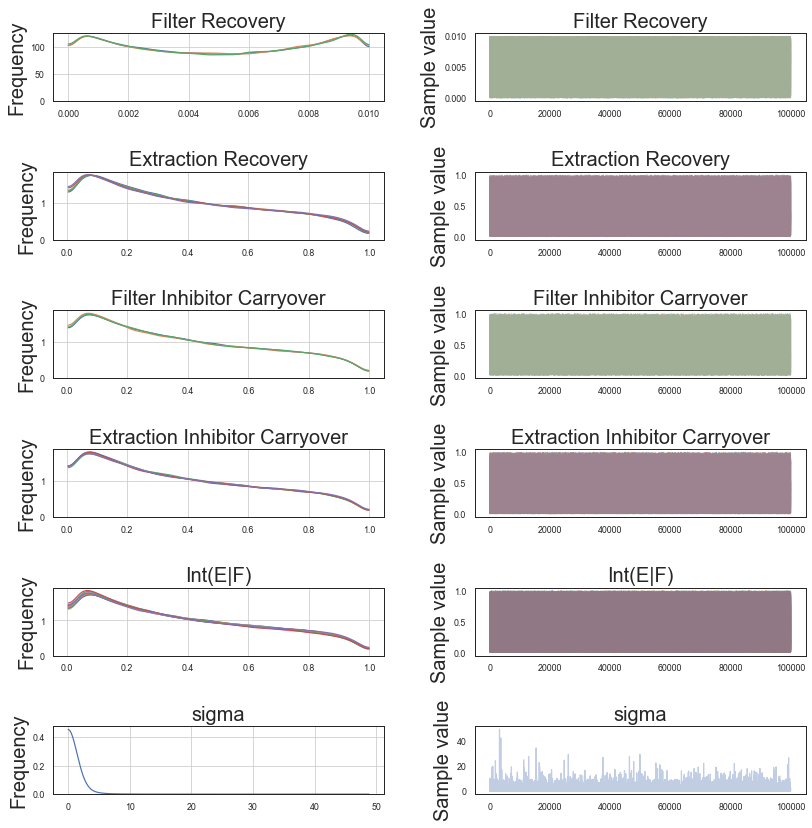

In [55]:
#sns.set(style="white")
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":30,"axes.titlesize":20,"axes.labelsize":20},style="white", context='paper')
trace_full_interference = approx_with_int.sample(draws=100000)
pm.traceplot(trace_full_interference, grid = True);
pm.summary(trace_full_interference).round(5)


In [46]:
plt.rcParams["figure.figsize"] = (11.7,8.27)


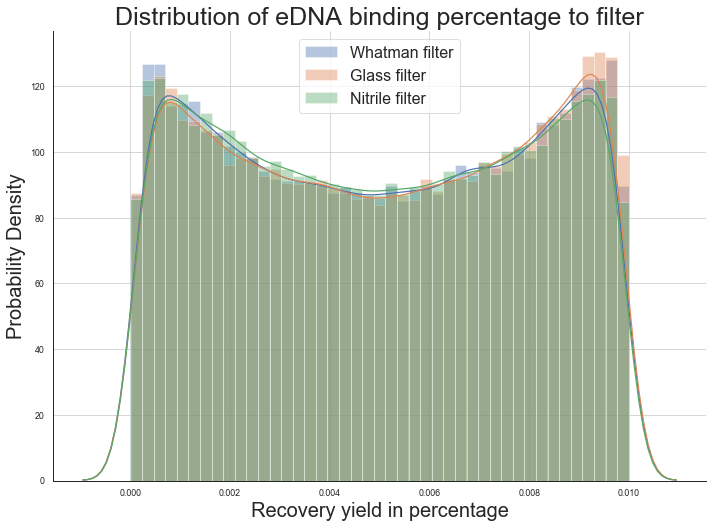

In [47]:
sns.distplot(trace_full_interference['Filter Recovery'].T[0], label = 'Whatman filter', norm_hist= True)
sns.distplot(trace_full_interference['Filter Recovery'].T[1], label = 'Glass filter', norm_hist= True)
sns.distplot(trace_full_interference['Filter Recovery'].T[2], label = 'Nitrile filter', norm_hist= True)
plt.xlabel('Recovery yield in percentage',  fontsize = 20)
plt.ylabel('Probability Density',  fontsize = 20)
plt.title('Distribution of eDNA binding percentage to filter', fontsize = 25)
plt.legend(loc ='best',  prop={'size': 16})
sns.despine()
plt.grid()

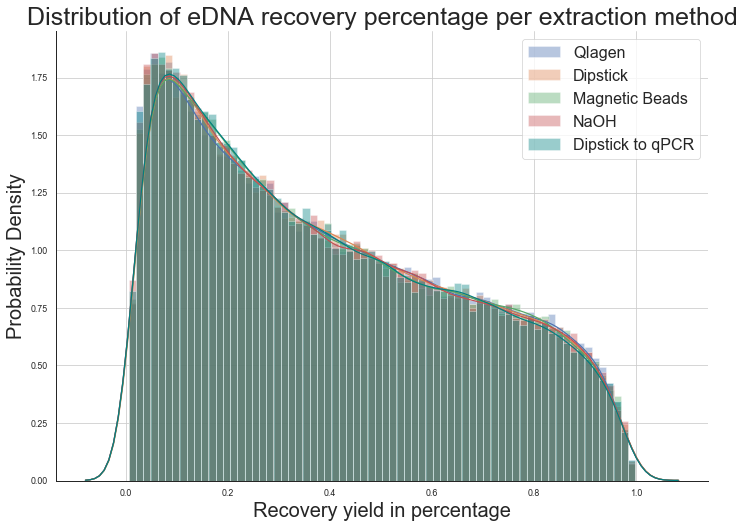

In [48]:
sns.distplot(trace_full_interference['Extraction Recovery'].T[0], label = 'QIagen', norm_hist= True, bins=70)
sns.distplot(trace_full_interference['Extraction Recovery'].T[1], label = 'Dipstick', norm_hist= True, bins=70)
sns.distplot(trace_full_interference['Extraction Recovery'].T[3], label = 'Magnetic Beads', norm_hist= True, bins=70)
sns.distplot(trace_full_interference['Extraction Recovery'].T[2], label = 'NaOH', norm_hist= True, bins=70)
sns.distplot(trace_full_interference['Extraction Recovery'].T[4], label = 'Dipstick to qPCR', norm_hist= True, bins=70, color='teal')
plt.xlabel('Recovery yield in percentage',  fontsize = 20)
plt.ylabel('Probability Density',  fontsize = 20)
plt.title('Distribution of eDNA recovery percentage per extraction method', fontsize = 25)
plt.legend(loc ='best',  prop={'size': 16})
sns.despine()
plt.grid()

In [58]:
with full_model:
    inference = pm.ADVI()
    approx = pm.fit(n=500000, method=inference)

Average Loss = -526.46: 100%|█████████▉| 499862/500000 [05:06<00:00, 1921.68it/s]Interrupted at 499,999 [99%]: Average Loss = -509.47


,mean,sd,mc_error,hpd_2.5,hpd_97.5
Filter Recovery__0,0.00031,0.00009,0.00000,0.00015,0.00049
Filter Recovery__1,0.00072,0.00009,0.00000,0.00056,0.00090
Filter Recovery__2,0.00117,0.00009,0.00000,0.00101,0.00135
Extraction Recovery__0,0.69573,0.05420,0.00016,0.58678,0.79695
Extraction Recovery__1,0.06857,0.05280,0.00017,0.00877,0.17295
Extraction Recovery__2,0.42216,0.05436,0.00015,0.31777,0.52917
Extraction Recovery__3,0.30135,0.05340,0.00016,0.19953,0.40661
Extraction Recovery__4,0.19466,0.07876,0.00029,0.06184,0.35032
Filter Inhibitor Carryover__0,0.02091,0.01524,0.00005,0.00574,0.04907
Filter Inhibitor Carryover__1,0.03772,0.01526,0.00005,0.01419,0.06778


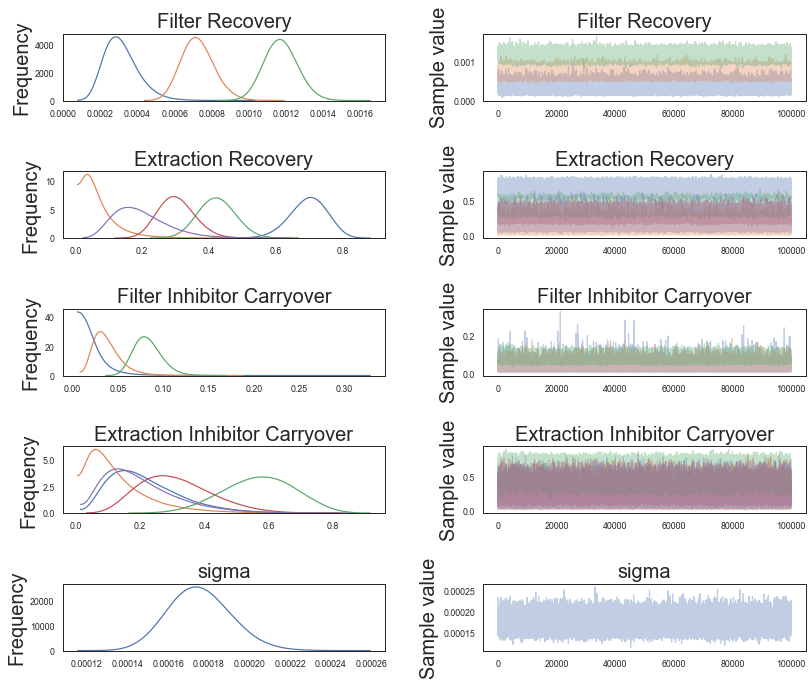

In [61]:
trace_full = approx.sample(draws=100000)
pm.traceplot(trace_full); #, grid = True
pm.summary(trace_full).round(5)

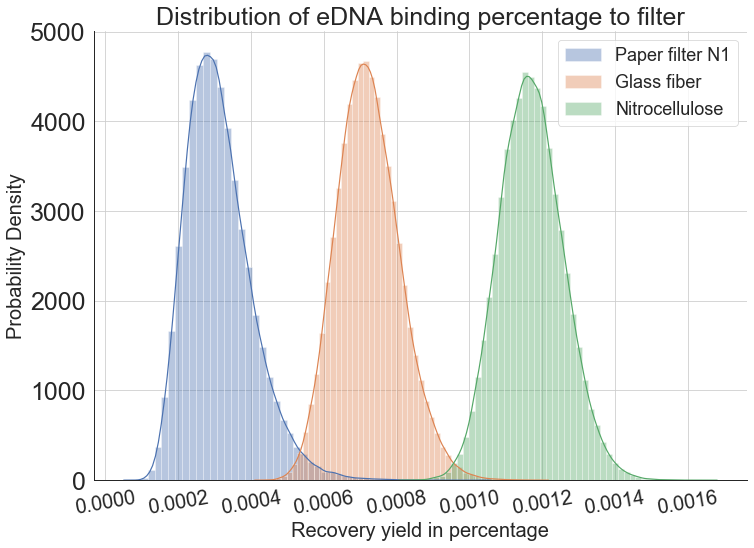

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":30,"axes.titlesize":20,"axes.labelsize":20},style="white", context='paper')

#plt.subplot(1,2,1)
sns.distplot(trace_full['Filter Recovery'].T[0], label = 'Paper filter N1', norm_hist= True)
sns.distplot(trace_full['Filter Recovery'].T[1], label = 'Glass fiber', norm_hist= True)
sns.distplot(trace_full['Filter Recovery'].T[2], label = 'Nitrocellulose', norm_hist= True)
plt.xlabel('Recovery yield in percentage',  fontsize = 20)
plt.ylabel('Probability Density',  fontsize = 20)
plt.title('Distribution of eDNA binding percentage to filter', fontsize = 25)
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=25)
#plt.text(.0006, 250, '4.75% overlap',  horizontalalignment='center', fontsize = 14)
#plt.text(.00095, 250, '20.3% overlap',  horizontalalignment='center', fontsize = 14)
plt.legend(loc ='best',  prop={'size': 18})
sns.despine()
plt.grid()
plt.savefig('filter yield distribution')

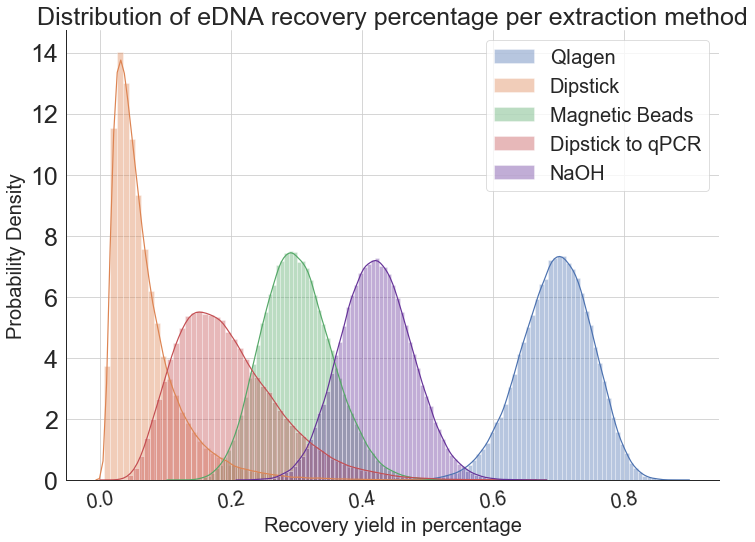

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":30,"axes.titlesize":20,"axes.labelsize":20},style="white", context='paper')

sns.distplot(trace_full['Extraction Recovery'].T[0], label = 'QIagen', norm_hist= True, bins=70)
sns.distplot(trace_full['Extraction Recovery'].T[1], label = 'Dipstick', norm_hist= True, bins=70)
sns.distplot(trace_full['Extraction Recovery'].T[3], label = 'Magnetic Beads', norm_hist= True, bins=70)
sns.distplot(trace_full['Extraction Recovery'].T[4], label = 'Dipstick to qPCR', norm_hist= True, bins=70)
sns.distplot(trace_full['Extraction Recovery'].T[2], label = 'NaOH', norm_hist= True, bins=70, color='rebeccapurple')
plt.xlabel('Recovery yield in percentage',  fontsize = 20)
plt.ylabel('Probability Density',  fontsize = 20)
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=25)
plt.title('Distribution of eDNA recovery percentage per extraction method', fontsize = 25)
plt.legend(loc ='best',  prop={'size': 20})
sns.despine()
plt.grid()
plt.savefig('extraction yield distribution')

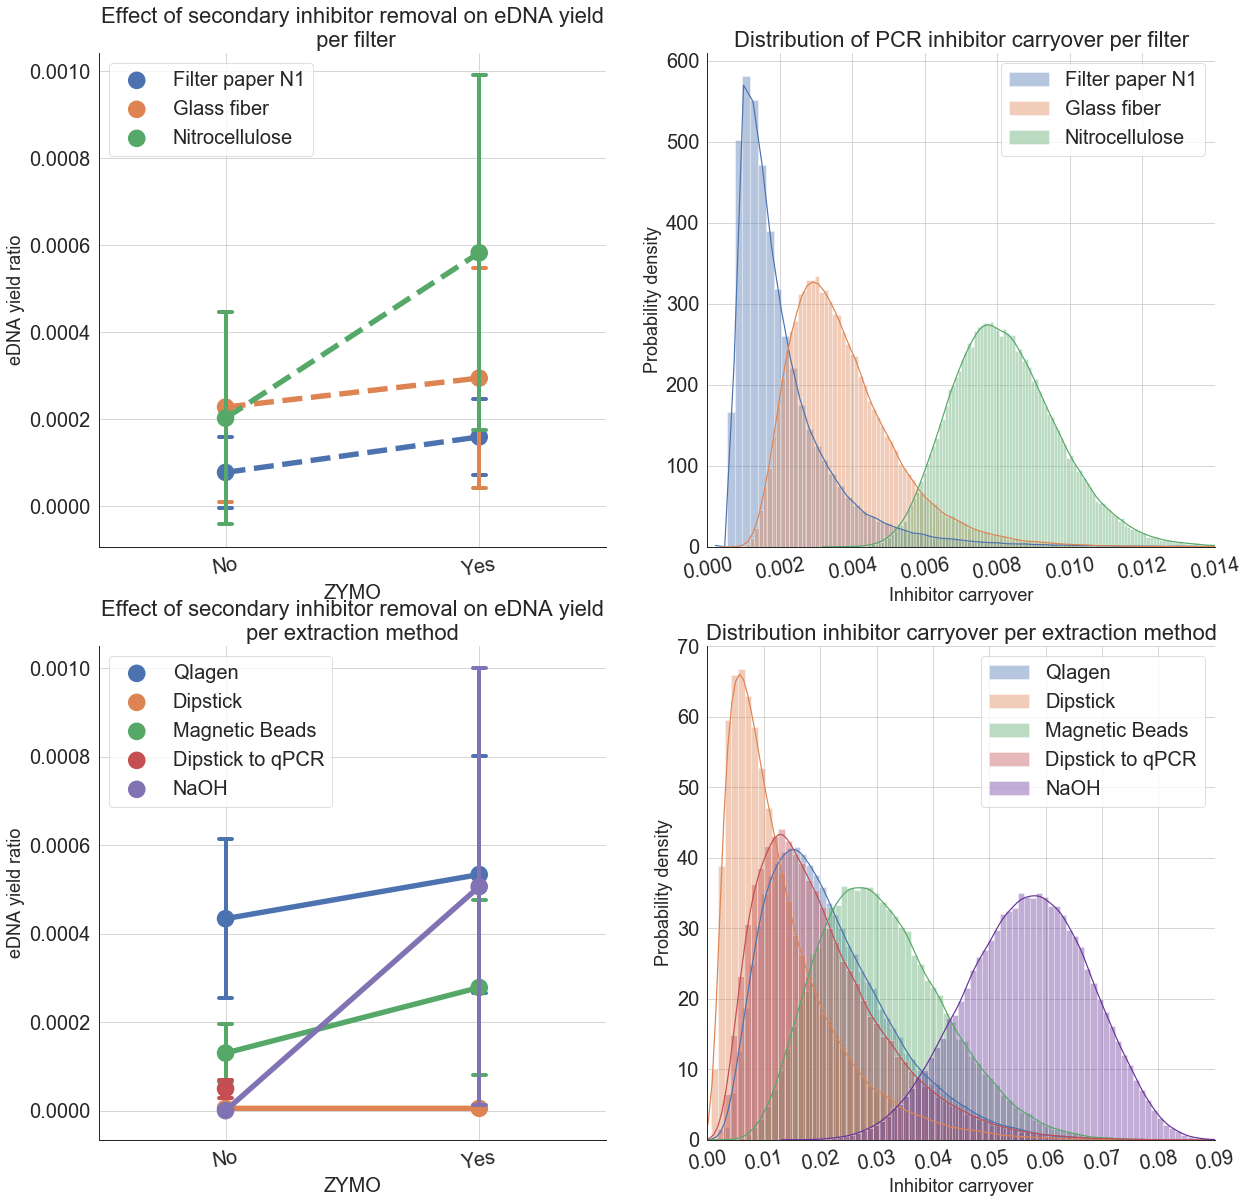

In [64]:
plt.rcParams["figure.figsize"] = (20,20)


plt.subplot(2,2,1)
with plt.rc_context({'lines.linewidth': 3}): sns.pointplot(y='eDNA yield percentage', x="ZYMO", hue="type of filter", errwidth =4, capsize=.05, linestyles='--', ci="sd", data=dfv_fig1)
plt.ylabel('eDNA yield ratio',  fontsize = 18)

plt.title('Effect of secondary inhibitor removal on eDNA yield\n per filter', fontsize = 22)
plt.legend(loc ='best',  prop={'size': 20})
plt.grid()
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=20)

plt.subplot(2,2,3)
with plt.rc_context({'lines.linewidth': 3}): g2 = sns.pointplot(y='eDNA yield percentage', hue="type of extraction", x="ZYMO",  errwidth =4, capsize=.05,
              ci="sd", data=dfv_fig1, palette = sns.color_palette())#palette=["b", "gray", "red", 'black', 'green'] , palette=["b", 'darkorange', "seagreen",'mediumturquoise', 'orangered']
#with plt.rc_context({'lines.linewidth': 3}):sns.pointplot(y="percentage", hue="type of extraction", x="ZYMO",
#               data=dfv_fig1) #dfv[dfv['log10[eDNA]']>-5]
plt.title('Effect of secondary inhibitor removal on eDNA yield\nper extraction method', fontsize = 22)
plt.legend(loc ='best',  prop={'size': 20})
plt.ylabel('eDNA yield ratio',  fontsize = 18)
plt.grid()
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=20)


plt.subplot(2,2,2)
sns.distplot(trace_full['Filter Inhibitor Carryover'].T[0]*.1, label = 'Filter paper N1', norm_hist= True, bins = 150)
sns.distplot(trace_full['Filter Inhibitor Carryover'].T[1]*.1, label = 'Glass fiber', norm_hist= True, bins = 150)
sns.distplot(trace_full['Filter Inhibitor Carryover'].T[2]*.1, label = 'Nitrocellulose', norm_hist= True, bins = 150)
plt.xlabel('Inhibitor carryover',  fontsize = 18)
plt.xlim([0,.014])
plt.ylabel('Probability density',  fontsize = 18)
plt.title('Distribution of PCR inhibitor carryover per filter', fontsize = 22)
plt.legend(loc ='best',  prop={'size': 20})
plt.grid()
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=20)

plt.subplot(2,2,4)
sns.distplot(trace_full['Extraction Inhibitor Carryover'].T[0]*.1, label = 'QIagen', norm_hist= True, bins=70)
sns.distplot(trace_full['Extraction Inhibitor Carryover'].T[1]*.1, label = 'Dipstick', norm_hist= True, bins=70)
sns.distplot(trace_full['Extraction Inhibitor Carryover'].T[3]*.1, label = 'Magnetic Beads', norm_hist= True, bins=70)
sns.distplot(trace_full['Extraction Inhibitor Carryover'].T[4]*.1, label = 'Dipstick to qPCR', norm_hist= True, bins=70)
sns.distplot(trace_full['Extraction Inhibitor Carryover'].T[2]*.1, label = 'NaOH', norm_hist= True, bins=70, color='rebeccapurple')
plt.xlabel('Inhibitor carryover',  fontsize = 18)
plt.xlim([0,.09])
#plt.xticks(np.linspace(0, 0.09, 9))
plt.ylabel('Probability density',  fontsize = 18)
plt.title('Distribution inhibitor carryover per extraction method', fontsize = 22)
plt.legend(loc ='best',  prop={'size': 20})
sns.despine()
plt.grid()
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=20)





plt.savefig('inhibitor effects.png')

# comparing interference model with model without interference

In [48]:
no_interference_model_loo = pm.loo(trace_full, full_model)
interference_model_loo = pm.loo(trace_full_interference, full_model_with_interference)

full_model.name = 'Model without interference'
full_model_with_interference.name = 'Model with interference'

df_comp_LOO = pm.compare({full_model: trace_full, full_model_with_interference: trace_full_interference}, ic='LOO')
df_comp_LOO


/home/thiagoms/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:292: UserWarning: Estimated shape parameter of Pareto distribution is
        greater than 0.7 for one or more samples.
        You should consider using a more robust model, this is because
        importance sampling is less likely to work well if the marginal
        posterior and LOO posterior are very different. This is more likely to
        happen with a non-robust model and highly influential observations.
  happen with a non-robust model and highly influential observations.""")
/home/thiagoms/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:292: UserWarning: Estimated shape parameter of Pareto distribution is
        greater than 0.7 for one or more samples.
        You should consider using a more robust model, this is because
        importance sampling is less likely to work well if the marginal
        posterior and LOO posterior are very different. This is more likely to
        happen with a non-robu

,LOO,pLOO,dLOO,weight,SE,dSE,shape_warn
Model without interference,-945.73,121.31,0,1,75.8,0,1
Model with interference,-566.45,317.01,379.28,0,135.29,96.32,1


In [49]:
no_interference_model_waic = pm.waic(trace_full, full_model)
interference_model_waic = pm.waic(trace_full_interference, full_model_with_interference)

full_model.name = 'Model without interference'
full_model_with_interference.name = 'Model with interference'

df_comp_waic = pm.compare({full_model: trace_full, full_model_with_interference: trace_full_interference})
df_comp_waic

/home/thiagoms/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)
/home/thiagoms/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)
/home/thiagoms/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)
/home/thiagoms/anaconda3/lib/python3.7/site-packages/pymc3/stats.py:211: Use

,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
Model without interference,-1140.87,23.74,0,0.93,34.13,0,1
Model with interference,-1120.45,40.01,20.43,0.07,33.13,10.87,1


In [50]:
df_comp = pd.concat([df_comp_waic.iloc[:, :-1], df_comp_LOO.iloc[:, :-1]], axis =1)
df_comp

,WAIC,pWAIC,dWAIC,weight,SE,dSE,LOO,pLOO,dLOO,weight,SE,dSE
Model without interference,-1140.87,23.74,0,0.93,34.13,0,-945.73,121.31,0,1,75.8,0
Model with interference,-1120.45,40.01,20.43,0.07,33.13,10.87,-566.45,317.01,379.28,0,135.29,96.32


In [53]:
%%time
def OVL_two_random_arr(arr1, arr2, number_bins):
    # Determine the range over which the integration will occur
    min_value = np.min((arr1.min(), arr2.min()))
    max_value = np.min((arr1.max(), arr2.max()))
    # Determine the bin width
    bin_width = (max_value-min_value)/number_bins
    #For each bin, find min frequency
    lower_bound = min_value #Lower bound of the first bin is the min_value of both arrays
    min_arr = np.empty(number_bins) #Array that will collect the min frequency in each bin
    for b in range(number_bins):
        higher_bound = lower_bound + bin_width #Set the higher bound for the bin
        #Determine the share of samples in the interval
        freq_arr1 = np.ma.masked_where((arr1<lower_bound)|(arr1>=higher_bound), arr1).count()/len(arr1)
        freq_arr2 = np.ma.masked_where((arr2<lower_bound)|(arr2>=higher_bound), arr2).count()/len(arr2)
        #Conserve the lower frequency
        min_arr[b] = np.min((freq_arr1, freq_arr2))
        lower_bound = higher_bound #To move to the next range
    return min_arr.sum()    

print(OVL_two_random_arr(trace_full['Filter Recovery'].T[1], trace_full['Filter Recovery'].T[2], 10000))

0.011270000000000002
CPU times: user 19.8 s, sys: 0 ns, total: 19.8 s
Wall time: 19.6 s


# testing RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
leF = preprocessing.LabelEncoder()
leE = preprocessing.LabelEncoder()
leZ = preprocessing.LabelEncoder()

In [53]:
#getting predictor datab
filterType     = list(dfv['type of filter'])
extractionType = list(dfv['type of extraction'])
ifZymo         = list(dfv.ZYMO)
#geting output data
Output         = list(dfv.eDNA)
Output = [1e-10 if np.isnan(x) else x for x in Output ]


In [54]:
#encoding classes
leF.fit(filterType)
leE.fit(extractionType)
leZ.fit(ifZymo)
EncodedFilter      = leF.transform(filterType)
EncodedExtraction  = leE.transform(extractionType)
EncodedZymo        = leZ.transform(ifZymo)
#use le.inverse_transform(y) to go back
X  = list(zip(EncodedFilter, EncodedExtraction, EncodedZymo))


In [55]:
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X, Output)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
print(regr.feature_importances_)

[0.27803322 0.60819921 0.11376758]


In [57]:
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

dic = {0: 'Filter', 1:'Extraction method', 2: 'Inhibitor effects'}

for f in range(np.array(X).shape[1]):
    print("%s. feature %s (%f)" % (f + 1, dic[indices[f]], importances[indices[f]]))

1. feature Extraction method (0.608199)
2. feature Filter (0.278033)
3. feature Inhibitor effects (0.113768)


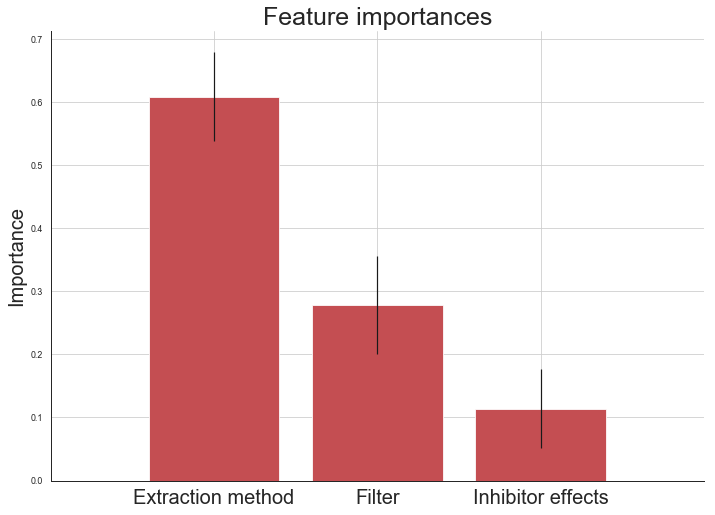

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":30,"axes.titlesize":20,"axes.labelsize":20},style="white", context='paper')
plt.figure()
plt.title("Feature importances", fontsize = 25)
plt.bar(range(np.array(X).shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.array(X).shape[1]), [dic[x] for x in indices], fontsize = 20)
plt.ylabel('Importance', fontsize = 20)
plt.xlim([-1, np.array(X).shape[1]])
sns.despine()
plt.grid()
plt.savefig('feature importance.png')

plt.show()


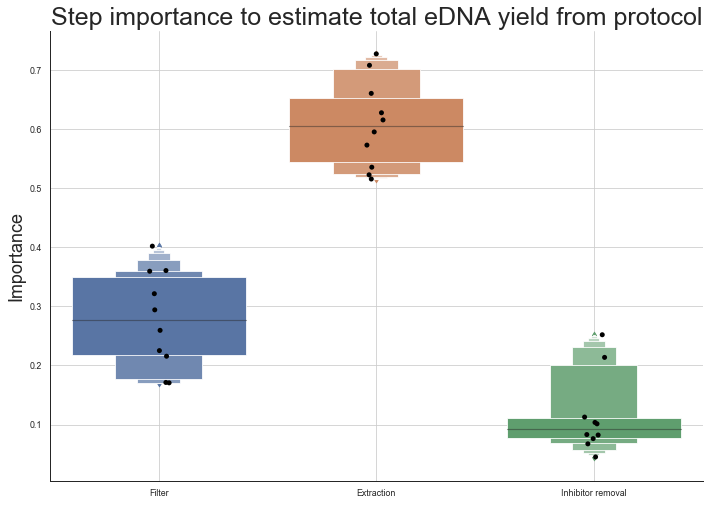

In [59]:
all_feat_imp_df = pd.DataFrame(data=[tree.feature_importances_ for tree in 
                                     regr.estimators_],
                               columns=['Filter','Extraction','Inhibitor removal'])

(sns.boxenplot(data=all_feat_imp_df)
        .set(title='Feature Importance Distributions',
             ylabel='Importance'));
(sns.stripplot(data=all_feat_imp_df, color = 'black', jitter = .05)
        .set(title='Feature Importance Distributions',
             ylabel='Importance'));
plt.ylabel('Importance',  fontsize = 18)
#plt.xlabel( fontsize = 18)

plt.grid()
plt.title('Step importance to estimate total eDNA yield from protocol', fontsize = 25)
sns.despine()
plt.savefig('fig importance 2.png')

## testing SHAP for visualization of tree regression javascript will work on jupyter notebook though

In [60]:
import shap

dfXshap = pd.DataFrame(X, columns = ['filter', 'extraction', 'inhibitor removal'])
shap.initjs()
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(dfXshap)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], dfXshap.iloc[0,:])

In [61]:
shap.force_plot(explainer.expected_value, shap_values,  dfXshap)

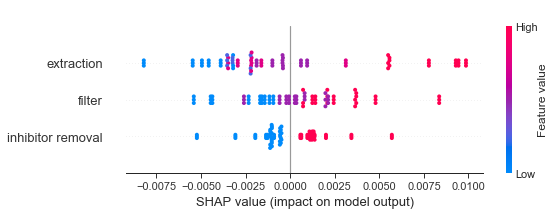

In [62]:
shap.summary_plot(shap_values, dfXshap)

## according to this classifier the most important predictor to DNA recovery is the extraction method, followed by the filter type and in this case zymo wasn't that important: maybe there weren't many inhibitors in the sampled location

In [65]:
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
dfshuffle = shuffle(dfv)

In [66]:
#training data

filterType     = list(dfv['type of filter'])[:60]
extractionType = list(dfv['type of extraction'])[:60]
ifZymo         = list(dfv.ZYMO)[:60]
#geting output data
Output         = list(dfv.eDNA)[:60]

In [67]:
EncodedFilter      = leF.transform(filterType)
EncodedExtraction  = leE.transform(extractionType)
EncodedZymo        = leZ.transform(ifZymo)
#use le.inverse_transform(y) to go back
X  = list(zip(EncodedFilter, EncodedExtraction, EncodedZymo))

NameError: name 'leF' is not defined

In [68]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
cv_results = cross_validate(regr, X, Output, return_train_score=False, scoring=('r2', 'neg_mean_squared_error'))

In [69]:
print(sorted(cv_results.keys()))
print(cv_results['test_neg_mean_squared_error']) 
print(cv_results['test_r2'])

['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2']
[-1.66225417e-06 -1.66208466e-06 -6.03149048e-06]
[0.93855895 0.94439453 0.82627847]


# ploting Random forest

In [73]:
#%matplotlib inline
%matplotlib ipympl 
%matplotlib widget

#getting predictor data
filterType     = list(dfv['type of filter'])
extractionType = list(dfv['type of extraction'])
ifZymo         = list(dfv.ZYMO)
#geting output data
Output         = list(dfv.eDNA)
#encoding classes
leF.fit(filterType)
leE.fit(extractionType)
leZ.fit(ifZymo)
EncodedFilter      = leF.transform(filterType)
EncodedExtraction  = leE.transform(extractionType)
EncodedZymo        = leZ.transform(ifZymo)
#use le.inverse_transform(y) to go back
X  = list(zip(EncodedFilter, EncodedExtraction, EncodedZymo))
regr = RandomForestRegressor(max_depth=30, random_state=0)
regr.fit(X, Output)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [74]:
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from math import log10
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
qw, qe , qr =get_test_data(.05)

In [75]:
Xt = range(3)
Yt = range(5)
Xt, Yt = np.meshgrid(Xt, Yt)
zyes = np.zeros([5,3])
for i in range(5):
    for j in range(3):
        zyes[i,j] = log10(regr.predict([(j,i,1)])[0])
zno = np.zeros([5,3])
for i in range(5):
    for j in range(3):
        zno[i,j] = log10(regr.predict([(j,i,0)])[0])

In [76]:
plt.rcParams["figure.figsize"] = (10,8)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')



dfv['mark']= dfv.apply(lambda row: markerMaker(row['type of extraction']),axis =1)
dfv['color']= dfv['type of filter'].apply(colormaker)
dfv['size'] =dfv.ZYMO.apply(lambda x: [150 if x == 'Yes' else 50][0])

for marker in ['p', 'o', 'x', '^', '+']:
    for color in ['green', 'b', 'red']:
        for size in [150, 50]:
            a = dfv[(dfv['mark']==marker)&(dfv['color']==color)&(dfv['size']==size)]
            if a.empty != 1: ax.scatter(ys=list(a["log10[eDNA]"]), zs=leF.transform(list(a["type of filter"])), xs=leE.transform(list(a['type of extraction'])) ,
                                        color=color, s= size, marker = marker, alpha = .6, label = a.iloc[0,10]) #
ax.set_ylim([-10.1, -1.5]) 
plt.ylabel('log10[eDNA]')
plt.xlabel('extraction method')
ax.set_zlabel('filter type')
plt.xticks(np.arange(5), ('Dipstick', 'dDipstick', 'NaOH', 'QIagen', 'Magnetic Beads'))
ax.set_zticks(np.arange(3))
ax.set_zticklabels(('Glass filter', 'Nitrile filter', 'Whatman filter'))
#dc = {'QIagen':'p' , 'Dipstick':'x', 'NaOH':'o', 'Magnetic Beads':'^', 'Dipstick- direct pcr':'+', 'whatman': 'b', 'glass filter': 'green', 'nitrile': 'red'}

ax.plot_wireframe(Yt, zyes, Xt, color = 'black', label = 'with Zymo')
ax.plot_wireframe(Yt, zno,Xt, color = 'gray', label = 'without Zymo')
ax.legend(loc=9, bbox_to_anchor=(0., -0.), ncol=8)

FigureCanvasNbAgg()

In [77]:
dfv.iloc[0, 10]

0.00022364708083477775

# testing retrival distribution for each of the methods using more data from Chinook and Sturgeon

In [68]:
import pandas as pd
multi = pd.read_csv('multispecies.csv')

multiClean = multi[multi.retrieval.notnull()].copy()

In [69]:
dicfil = {'nitrile': 'N', 'glass ': 'GF'}
dicext = {'NaOH': 'NaOH', 'beads': 'Mag Beads', 'QI':'QI', 'dDIP': 'dDip'}
multiClean.ext = multiClean.ext.apply(lambda x: dicext[x])
multiClean['filter'] = multiClean['filter'].apply(lambda x: dicfil[x])
multiClean['method'] = multiClean['filter'] + ' ' + multiClean['ext']
multiClean['initial [eDNA]'] = multiClean['conc eDNA'].apply(math.log10)


In [70]:
multiClean.shape

(72, 7)

In [71]:
multiClean

,Sample,filter,ext,conc eDNA,retrieval,method,initial [eDNA]
0,chinook,N,NaOH,1.00,-4.623,N NaOH,0.0
1,chinook,N,NaOH,1.00,-4.302,N NaOH,0.0
2,chinook,N,NaOH,1.00,-6.339,N NaOH,0.0
5,chinook,N,NaOH,0.10,-6.060,N NaOH,-1.0
10,chinook,N,Mag Beads,1.00,-3.190,N Mag Beads,0.0
11,chinook,N,Mag Beads,1.00,-2.796,N Mag Beads,0.0
12,chinook,N,Mag Beads,1.00,-3.775,N Mag Beads,0.0
13,chinook,N,Mag Beads,0.10,-3.380,N Mag Beads,-1.0
14,chinook,N,Mag Beads,0.10,-3.263,N Mag Beads,-1.0
15,chinook,N,Mag Beads,0.10,-2.898,N Mag Beads,-1.0


Text(0.5, 1.0, 'Secondary optimization of prtocols')

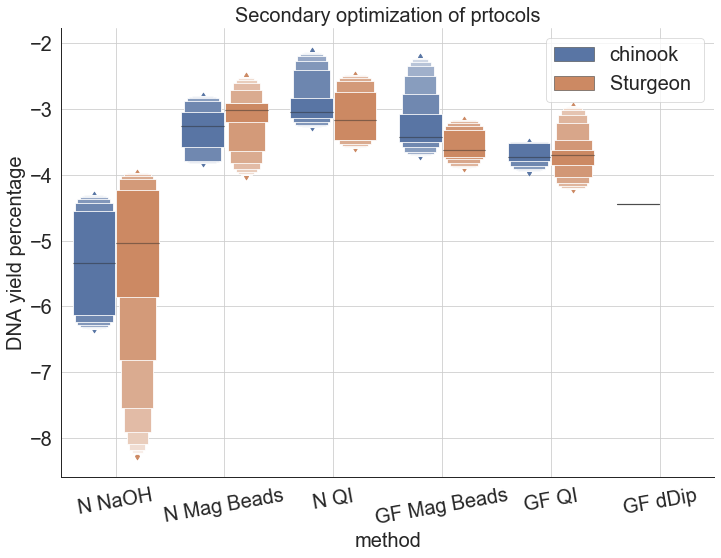

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":30,"axes.titlesize":20,"axes.labelsize":20},style="white", context='paper')

ax = sns.boxenplot(x="method", y="retrieval",hue='Sample',
              scale="linear", data=multiClean)
#ax = sns.stripplot(x="method", y="retrieval",data = multiClean[multiClean['Sample']== 'Sturgeon '] 
#              ,jitter=False, size= 5, color = 'blue')
#ax = sns.stripplot(x="method", y="retrieval",data = multiClean[multiClean['Sample']== 'chinook'] 
#              ,jitter=False, size= 5, color = 'red')
plt.legend(loc ='best',  prop={'size': 20})
sns.despine()
plt.grid()
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=20)
plt.ylabel('DNA yield percentage')
plt.title('Secondary optimization of prtocols')

Text(0.5, 51.40000000000002, 'DNA yield ')

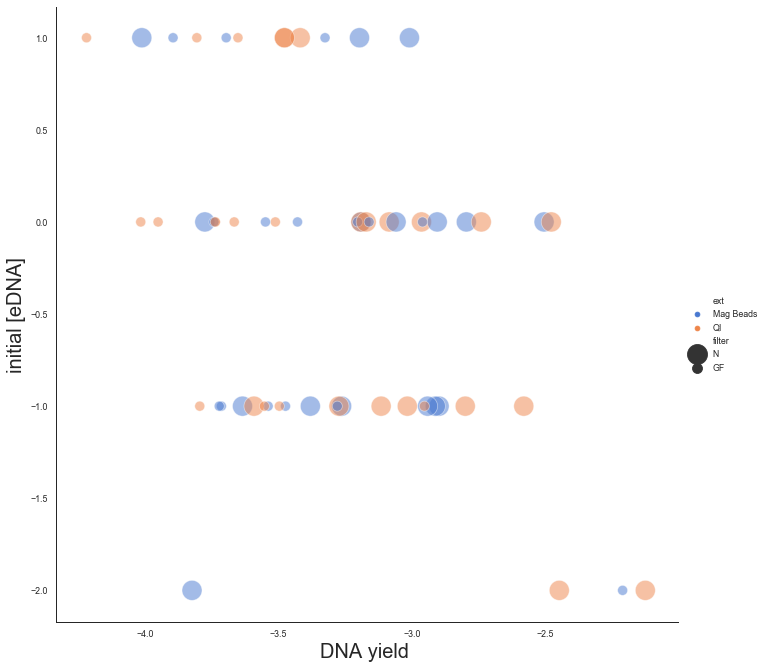

In [73]:
ax =sns.relplot(x="retrieval", y="initial [eDNA]", size="filter", hue="ext",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=10, data=multiClean[(multiClean.ext== 'Mag Beads') | (multiClean.ext == 'QI') ])
plt.xlabel('DNA yield ')

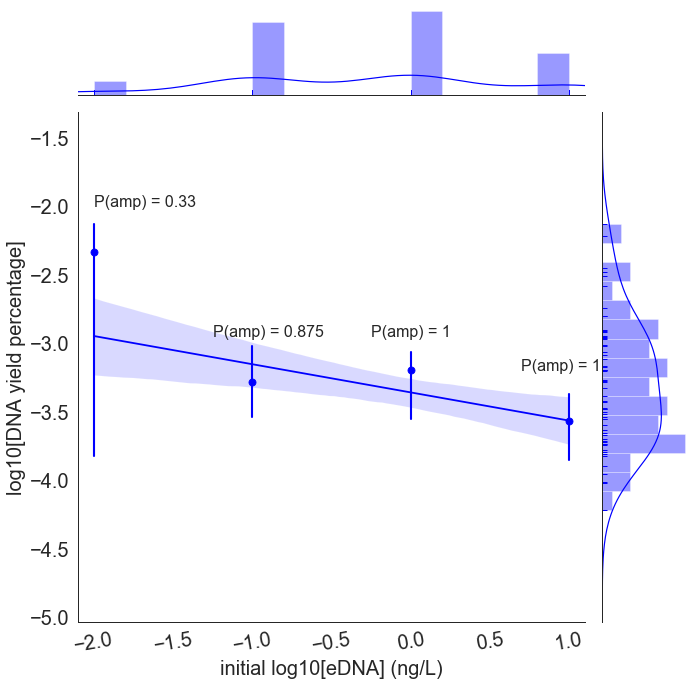

In [78]:
a = multiClean[(multiClean.ext== 'Mag Beads') | (multiClean.ext == 'QI')].copy()

g = sns.jointplot( "initial [eDNA]","retrieval", kind="reg", x_estimator=np.median, order = 1, truncate = True,
                  color="blue", height=10, data=a,  marginal_kws=dict(bins=15, rug=True))#pd.concat([a.iloc[:6], a.iloc[7:]])
plt.gca().annotate( 'P(amp) = 0.33', xy= (-2,-2), xytext=(-2,-2), fontsize = 16)
plt.gca().annotate( 'P(amp) = 0.875', xy= (-1.25,-2.95), xytext=(-1.25,-2.95), fontsize = 16)
plt.gca().annotate( 'P(amp) = 1', xy= (-.25,-2.8), xytext=(-.25,-2.95), fontsize = 16)
plt.gca().annotate( 'P(amp) = 1', xy= (1,-3.2), xytext=(.7,-3.2), fontsize = 16)
plt.ylabel('log10[DNA yield percentage]')
plt.xlim([-2.1, 1.1])
plt.xlabel('initial log10[eDNA] (ng/L)')

plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=20)
plt.savefig('FigS1.png')


In [75]:
from scipy.stats import linregress
linregress(a.retrieval.tolist(), a["initial [eDNA]"].tolist())

LinregressResult(slope=-0.710718404839934, intercept=-2.62312717085068, rvalue=-0.38254215314233736, pvalue=0.002345609102378894, stderr=0.2234781699198157)

In [76]:
best = multiClean[(multiClean.ext== 'Mag Beads') | (multiClean.ext == 'QI')].copy()

bestcomplete = multi[(multi.ext== 'Mag Beads') | (multi.ext == 'QI')].copy()
bestcomplete = bestcomplete[bestcomplete['conc eDNA']>0]
bestcomplete['initial [eDNA]'] = bestcomplete['conc eDNA'].apply(lambda x: math.log10(x))

In [204]:
value_prob_dict = {}
for value in sorted(best['initial [eDNA]'].unique()):
    print('value: {} -- prob: {} -- average retrival'.format(value, best[best['initial [eDNA]']== value].shape[0]/ 
                                         bestcomplete[bestcomplete['initial [eDNA]']== value].shape[0]/2))
    value_prob_dict[value] = best[best['initial [eDNA]']== value].shape[0]/bestcomplete[bestcomplete['initial [eDNA]']== value].shape[0]

value: -2.0 -- prob: 0.3333333333333333 -- average retrival
value: -1.0 -- prob: 0.875 -- average retrival
value: 0.0 -- prob: 1.0 -- average retrival
value: 1.0 -- prob: 1.0 -- average retrival


In [215]:
probfunction = pd.DataFrame([[-2,.333],[-1, .875],[0,1],[1,1], [-10,0]], columns=['initial eDNA', 'probability of amplification'])

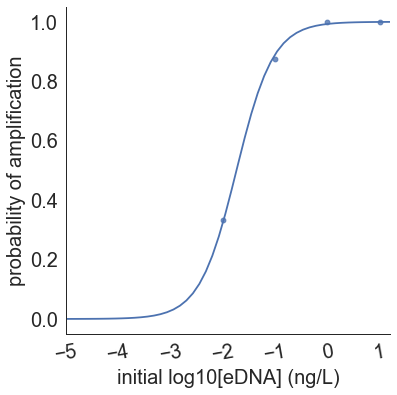

In [224]:
lm = sns.lmplot('initial eDNA', 'probability of amplification', data= probfunction, logistic=True, truncate=False, height=6)
plt.xticks(fontsize=20, rotation=10)
plt.yticks(fontsize=20)
plt.xlim([-5,1.2])
plt.xlabel('initial log10[eDNA] (ng/L)')
plt.savefig('correlation prob of amplification')

In [21]:
best['probability']= best['initial [eDNA]'].apply(lambda x: value_prob_dict[x])

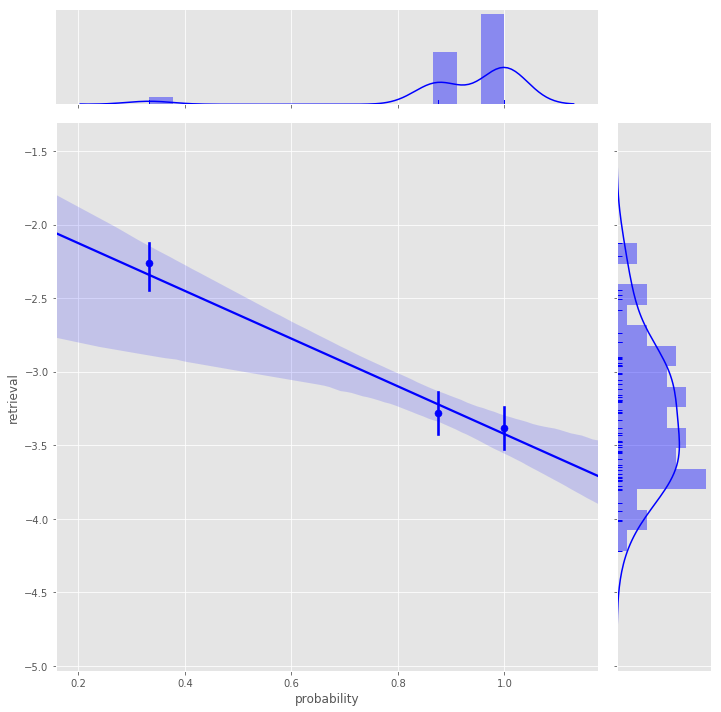

In [48]:
g = sns.jointplot(x="probability",y= "retrieval", kind="reg", robust= True,x_estimator=np.mean,
                  color="blue", height=10, data=pd.concat([best.iloc[:6], best.iloc[7:]]),  marginal_kws=dict(bins=15, rug=True))#, 

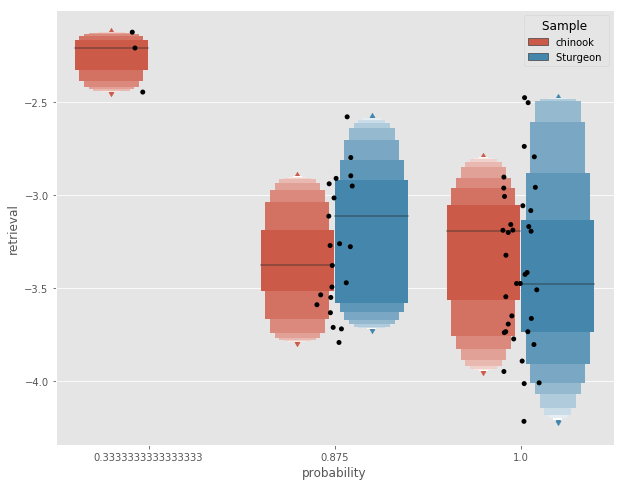

In [57]:
ax = sns.boxenplot(x="probability", y="retrieval",
              scale="linear", data=pd.concat([best.iloc[:6], best.iloc[7:]]), hue= 'Sample ')
ax = sns.stripplot(x="probability", y="retrieval",data=pd.concat([best.iloc[:6], best.iloc[7:]])
                   ,jitter=True, size= 5, color = 'black')

In [65]:
chinook_multi =pd.read_csv('multispecies_chinook.csv')
chinook_multi = chinook_multi[chinook_multi.retrieval.notnull()].copy()
chinook_multi['initial [eDNA]'] = chinook_multi['conc eDNA'].apply(lambda x: math.log10(x))
chinook_multi['probability']= chinook_multi['initial [eDNA]'].apply(lambda x: value_prob_dict[x])

# testing ML algorithm to predict initial eDNA from amp eDNA and prob of amplification

In [163]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,BaggingRegressor

X = list(zip(list(chinook_multi['ng of gblock']), list(chinook_multi['probability'])))
Y = list(chinook_multi['ini ng of gblock'])

In [174]:
regr =LinearRegression()# RandomForestRegressor(max_depth=30, random_state=0)Ridge(alpha =.1)#
regr.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [187]:
shape = (100, 100)
alist = []
for prob_num, prob in enumerate(np.linspace(0,1, shape[0])):
    for amp_edna_num, amp_edna in enumerate(np.linspace(-12, -6, shape[1])):
        alist+= [[prob, amp_edna, regr.predict(np.array([amp_edna,prob]).reshape(1, -1))[0]]]

In [188]:
data =pd.DataFrame(alist, columns=['probability', 'amp eDNA', 'total eDNA'])

In [189]:
data_heatmap = data.pivot('probability', 'amp eDNA', 'total eDNA')

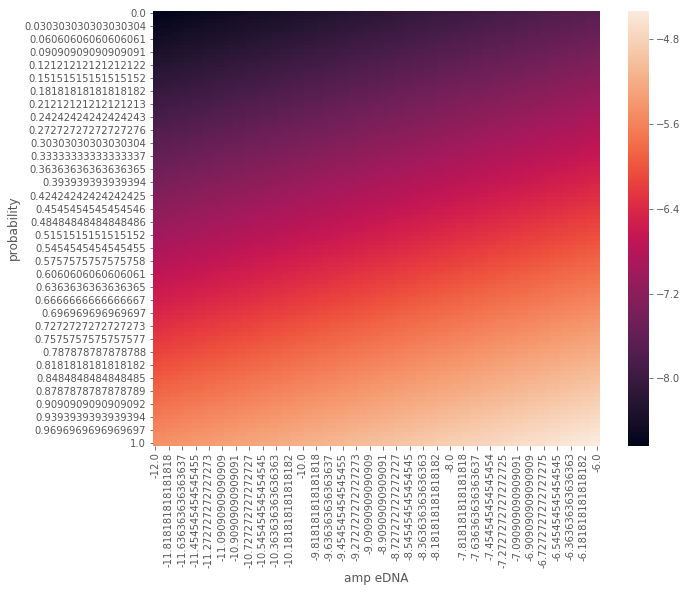

In [190]:
sns.heatmap(data_heatmap)

In [214]:
len('AGCACCCTCTAACATTTCAG')

20